In [49]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE

print(__doc__)

import sys
sys.path.append(f'../../')

from src.features.novelty_detector import NoveltyDetector

Automatically created module for IPython interactive environment


In [59]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#np.random.seed(42)

X, Y = make_classification(n_samples=5000, n_features=100, n_informative=50,
                           n_classes=5, n_clusters_per_class=1, random_state=0)


# tsne = TSNE()
# X = tsne.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 100), (1500, 100), (3500,), (1500,))

In [60]:
X_train = X_train[y_train != 1]
y_train = y_train[y_train != 1]
X_train.shape

(2795, 100)

In [61]:
X_inliers = X_train
ground_truth_in = np.ones(len(X_inliers), dtype=int)

X_outliers = X_test
ground_truth_out = [1 if c != 1 else -1 for c in y_test]

In [62]:
nd = NoveltyDetector()

In [63]:
nd.fit(X_inliers)
y_pred = nd.predict(X_outliers)

In [64]:
n_errors = (y_pred != ground_truth_out).sum()
X_scores = nd.score_samples(X_outliers)

In [68]:
np.ones((2, 10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [73]:
mask = np.isin(y_test, y_train)
y_test[mask].shape, \
X_test[mask].shape

((1209,), (1209, 100))

In [21]:
novelties, notnovelties = nd.select_novelties(X)
novelties.shape, notnovelties.shape

((656, 100), (4344, 100))

In [23]:
np.unique(y_pred[y_test!=1], return_counts=True), \
np.unique(y_pred[y_test==1], return_counts=True)

((array([-1,  1]), array([ 119, 1060])), (array([-1,  1]), array([ 94, 227])))

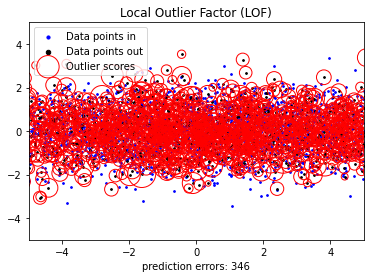

In [13]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='b', s=3., label='Data points in')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='k', s=3., label='Data points out')

# plot circles with radius proportional to the outlier scores

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [14]:
s=1000 * radius
s.shape
X_scores.shape

(1500,)

In [22]:
X_inliers.shape, X_outliers.shape



((array([-1,  1]), array([ 119, 1060])), (array([-1,  1]), array([ 94, 227])))

((array([-1,  1]), array([ 119, 1060])), (array([-1,  1]), array([ 94, 227])))

In [ ]:
clf.score_samples(X_outliers)